In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

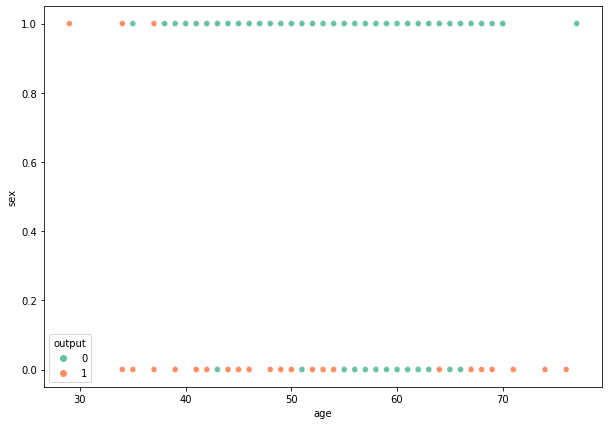

In [8]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='age',y='sex',data=df,hue='output',palette='Set2')

In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


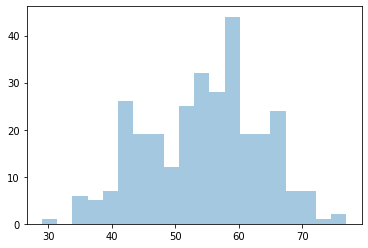

In [16]:
sns.distplot(x=df['age'],kde=False,bins=20)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

In [19]:

X = df.drop('output',axis=1)
y = df['output']


In [20]:
from sklearn.model_selection import train_test_split


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [31]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [32]:
from keras.models import Sequential
from keras.layers import  Dense , Dropout

In [33]:
model = Sequential()


In [34]:
model.add(Dense(32,activation='relu',input_shape=(13,)))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



In [35]:
model.fit(X_train_sc, y_train, batch_size=80 , epochs=200,validation_data=(X_test_sc,y_test))

Epoch 1/200
4/4 [==============================] - 1s 141ms/step - loss: 0.7014 - accuracy: 0.5455 - val_loss: 0.6219 - val_accuracy: 0.7541
Epoch 2/200
4/4 [==============================] - 0s 13ms/step - loss: 0.6427 - accuracy: 0.6777 - val_loss: 0.5618 - val_accuracy: 0.7541
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 0.5937 - accuracy: 0.7562 - val_loss: 0.5259 - val_accuracy: 0.7705
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 0.5568 - accuracy: 0.7769 - val_loss: 0.4979 - val_accuracy: 0.7869
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 0.5415 - accuracy: 0.7851 - val_loss: 0.4747 - val_accuracy: 0.7869
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4883 - accuracy: 0.8182 - val_loss: 0.4536 - val_accuracy: 0.7869
Epoch 7/200
4/4 [==============================] - 0s 14ms/step - loss: 0.4961 - accuracy: 0.8140 - val_loss: 0.4499 - val_accuracy: 0.7869
Epoch 8/200
4/4 [==

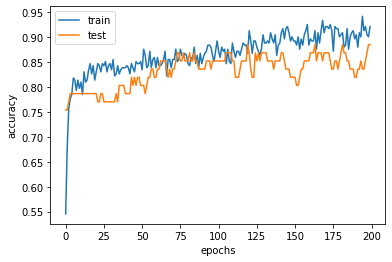

In [41]:
plt.plot(model.history.history['accuracy'],label='train')
plt.plot(model.history.history['val_accuracy'],label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

(1599,)